# Learn how to load, read and write different commonly used file formats in Python3

In [16]:
# import sth
import os
import os.path as osp
from glob import glob
from tqdm import tqdm
import time
import numpy as np

import json

## Plain text format (e.g `.txt`) IO

In [2]:
def load_flist(flist):
    """
    flist: txt file path, each line is a path to a image
    """
    imlist = []
    with open(flist, 'r') as rf:
        for line in rf.readlines():
            impath = line.strip()
            imlist.append(impath)
    rf.close()
    return imlist


def load_flist(file_path, method=1):
    if method == 1: # recommended
        lines = open(file_path).read().splitlines()
        return lines
    elif method == 2:
        imlist = []
        with open(file_path, 'r') as rf:
            for line in rf.readlines():
                impath = line.strip()
                imlist.append(impath)

        return imlist
    elif method == 3:
        fp = open(file_path)
        content = [line.strip() for line in fp]
        return content
    elif method == 4:
        pass
    else:
        raise NotImplementedError
    

### 写txt文件操作
def write2txt(content, file_path, method=1):
    if method == 1:
        fp = open(file_path, 'w')
        fp.write(content)
        fp.close()
    elif method == 2:
        with open(file_path, 'w') as fd:
            fd.write(content)
    else:
        raise NotImplementedError


### 读txt文件操作
filename = "../data/example.txt"
txt = open(filename)
text_str = txt.read()
print(text_str, type(txt)) #即打印所有文件内容
txt.close()


def writelist2file(file_path, content):
    """Write content to a plain text file line by line
    """
    fp = open(file_path, 'w')
    for line in content:
        fp.write(line + '\n')
    fp.close()

def writelist2file2(file_path, content):
    """Write content to a plain text file line by line
    """
    with open(file_path, 'w') as fd:
        fd.writelines([i + '\n' for i in content])


My name is zhanghaiming. <class '_io.TextIOWrapper'>
['210905_368_4', '210905_590_4', '210905_590_5', '210905_598_4', '210905_598_5', '210905_647_5', '210905_647_6', '210906_28_6', '210903_8_4', '210903_20_6', '210903_20_7', '210903_20_8', '210903_49_4', '210903_49_6', '210903_49_7', '210903_49_8', '210903_50_4', '210903_50_7', '210903_51_5', '210903_51_6', '210903_51_7', '210903_197_0', '210903_198_0', '210904_21_1', '210904_22_3', '210904_22_4', '210904_22_6', '210904_22_7', '210904_22_20', '210904_28_0', '210904_28_2', '210904_28_3', '210904_28_4', '210904_28_5', '210904_28_7', '210904_244_4', '210904_244_5', '210904_244_6', '210904_244_7', '210904_248_0', '210904_248_1', '210904_248_2', '210904_248_3', '210904_248_4', '210904_248_5', '210904_397_4', '210904_397_12', '210904_402_3', '210904_402_8', '210904_419_5', '210904_628_0', '210904_628_1', '210904_628_3', '210904_628_5', '210904_1168_6', '210904_1168_7', '210904_1168_8', '210904_1210_0', '210904_1214_1', '210904_1223_8', '2109

### 使用numpy读写txt文件

In [17]:
import numpy as np
import os.path as osp

# input_text_file = "test.txt"
# data_input = np.loadtxt(input_text_file, delimiter='\n', dtype=np.str)
# print(data_input.shape, data_input[:3])


def read_txt_to_numpy(file_path):
    a = np.loadtxt(file_path)
    print(a.shape, a.dtype)

def read_kitti_oxts(dataset_root, sequence_num):
    """
    read txt file line by line to a dictionary
    """
    oxts_file = os.path.join(dataset_root, 'oxts/{0:04d}.txt'.format(int(sequence_num)))

    with open(oxts_file, 'r') as f:
        lines = f.readlines()
    
    print(len(lines))
    oxts_dict = {}
    for i, line in enumerate(lines):
        oxt = line.strip().split(' ')
        oxts_dict[i] = oxt
    return oxts_dict

def save_txt_files():
    landmark = np.random.randn(68, 2)
    save_path = "./data/lm.txt"
    np.savetxt(save_path, landmark)


txt_filename = "/data/data2/zhanghm/Datasets/PIRender_Vox/train/id10198#Y8MjZMcg5J8#005118#005453.txt"
lm = np.loadtxt(txt_filename).astype(np.float32)
lm = lm.reshape([402, -1, 2])
print(lm.shape)

save_dir = "/home/zhanghm/Temp/cv-fighter/Cheat-Sheet-For-FFmpeg/vox1/train/id10198#Y8MjZMcg5J8#005118#005453_new"
for i in range(lm.shape[0]):
    file_name = f"{i:06d}.txt"
    save_path = osp.join(save_dir, file_name)
    np.savetxt(save_path, lm[i])

(402, 68, 2)


### Read and statistic the text file contents

In [2]:
from collections import defaultdict

def stat_video_images():
    split_fp = "/home/zhanghm/Research/Github/pix2pixHD/datasets/train.txt"

    lines = open(split_fp).read().splitlines()
    print(len(lines), type(lines))

    name_idx_dict = defaultdict(list)
    for line in lines:
        name = line.split('/')[0]
        name_idx_dict[name].append(line)

    print(len(name_idx_dict))
    print(len(name_idx_dict['WDA_ColinAllred_000']))
    print(name_idx_dict['WDA_ColinAllred_000'][:5])

    all_video_dir = list(name_idx_dict.keys())
    print(all_video_dir[:4])


def stat_unique_items():
    train_fp = "/home/zhanghm/Research/V100/TalkingFaceFormer/data/HDTF_preprocessed/train.txt"
    val_fp = "/home/zhanghm/Research/V100/TalkingFaceFormer/data/HDTF_preprocessed/val.txt"

    train_lines = open(train_fp).read().splitlines()
    val_lines = open(val_fp).read().splitlines()
    print(len(train_lines), len(val_lines))

    all_lines = set(train_lines + val_lines)
    print(len(all_lines))


stat_unique_items()

362 40
402


In [6]:
statistics_file = os.path.join("./data/HDTF_face3dmmformer_statistics.txt")

lines = open(statistics_file).read().splitlines()

data_dict = {}
for i, line in enumerate(lines):
    entry = line.strip().split(' ')
    data_dict[entry[0]] = entry[1]

for key, value in data_dict.items():
    print(key, value)

WDA_BarackObama_000 6600
WDA_CarolynMaloney1_000 6600
WDA_ChrisMurphy0_000 6600
WDA_ChrisVanHollen1_000 6600
WDA_JeanneShaheen0_000 6600
WDA_KimSchrier_000 6600
WRA_DanSullivan_000 6600
WRA_KellyAyotte_000 6600


## json format file IO processes

In [ ]:
### Load json file content to dictionary
basedir = "./data/"
splits = ['train', 'val', 'test']
metas = {}
for s in splits:
    with open(os.path.join(basedir, 'transforms_{}.json'.format(s)), 'r') as fp:
        metas[s] = json.load(fp)

In [12]:
import cv2
def validate_data(vid_file):
    video_stream = cv2.VideoCapture(vid_file)
    FRAME_COUNT = int(video_stream.get(cv2.CAP_PROP_FRAME_COUNT))
    vidname = os.path.basename(vid_file).split('.')[0]
    dirname = vid_file.split('/')[-2]

    fulldir = os.path.join("/data/zhanghm/speech_chinese_preprocessed", dirname, vidname)
    face_images_list = [file.path for file in os.scandir(fulldir)]
    face_num = len(face_images_list)

    if face_num != FRAME_COUNT:
        print(f"Error in {vid_file} video length:{FRAME_COUNT} face_num:{face_num}")


validate_data("/data/zhanghm/speech_chinese/210903/210903_101_17.mp4")


## Yaml file process

In [5]:
import yaml

with open('./data/meta_info.yaml','r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)

print(data, type(data))
print(data['num_frames'])

{'fps': 25, 'num_frames': 2077} <class 'dict'>
2077


## Load `.mat` Matlab type matrix file

In [33]:
import numpy as np
from scipy.io import loadmat, savemat
import time
import os.path as osp
from glob import glob
from tqdm import tqdm

def load_mat_file_basic():
    file_path = "/home/zhanghm/Research/Face/PIRender/Deep3DFaceRecon_pytorch/temp_data/face3dmm_coeff/video/id10198#Y8MjZMcg5J8#005118#005453.mat"
    coeff_params = loadmat(file_path)
    print(coeff_params.keys())

    trans_params = coeff_params['transform_params']
    print(trans_params.shape, trans_params[:2, ...])
    print(coeff_params['coeff'].shape)

    my_coeff_params = np.load("/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/pred_coeffs.npy")
    print(my_coeff_params.shape)

    diff = np.abs(my_coeff_params - coeff_params['coeff'])
    print(diff.max(), diff.min())

    my_trans_params = np.load("/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/transform_params.npy")
    print(my_trans_params.shape)
    diff = np.abs(my_trans_params - trans_params)
    print(diff.max(), diff.min())


def compare_data():
    file_path = "/home/zhanghm/Research/Face/PIRender/Deep3DFaceRecon_pytorch/temp_data/face3dmm_coeff/video/id10198#Y8MjZMcg5J8#005118#005453.mat"
    coeff_params = loadmat(file_path)

    file_path2 = "/home/zhanghm/Temp/cv-fighter/Cheat-Sheet-For-FFmpeg/vox1/train/deep3dface/000000.mat"
    coeff_params2 = loadmat(file_path2)
    print(coeff_params2['transform_params'])

    diff = np.abs(coeff_params['transform_params'][0:1, :] - coeff_params2['transform_params'])
    print(diff.max(), diff.min())

 
def load_mat_file_example():
    input_data = "/home/haimingzhang/Research/Face/Deep3DFaceRecon_pytorch/checkpoints/face_recon_feat0.2_augment-20210829T083504Z-001/results/gangqiang-2-30fps/epoch_20_000000/000000.mat"
    input_data = "../data/1.mat"

    input_data = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/FACIAL/gangqiang_video_preprocess_old/gangqiang-2_deep3Dface/000000.mat"
    face_params = loadmat(input_data)

    input_data = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/FACIAL/gangqiang_video_preprocess/gangqiang_deep3Dface/000000.mat"
    face_params2 = loadmat(input_data)

    diff = face_params2['coeff'] - face_params['coeff']
    print(np.max(diff))

    for key, value in face_params.items():
        if not key.endswith("__"):
            print(key, value.shape)
        else:
            print(key, value)

    coeff = face_params["coeff"]
    print(np.min(coeff), np.max(coeff))

    max_index, min_index = np.argmax(coeff), np.argmin(coeff)
    print(max_index, min_index)

def read_mat_content():
    file_path = "/home/haimingzhang/Research/Programming/cv-fighter/HDTF_preprocessed/WDA_MartinHeinrich_000/deep3dface/000000.mat"
    mat_content = loadmat(file_path)
    print(type(mat_content), mat_content.keys())
    
    print(mat_content['transform_params'])

    print(mat_content['transform_params'])

    for key, value in mat_content.items():
        if not key.endswith("__"):
            print(key, value.shape)
        else:
            print(key, value)

def stat_read_mat_time():
    import time
    data_dir = "/home/zhanghm/Research/V100/TalkingFaceFormer/data/HDTF_preprocessed/RD_Radio2_000/deep3dface"
    matrix_files = sorted(glob(osp.join(data_dir, "*.mat")))

    matrix_files = matrix_files[:100]
    
    start = time.time()
    for i in tqdm(matrix_files):
        mat_content = loadmat(i)
    end = time.time()
    print(i, end - start)


compare_data()

[[256.         256.           0.88179904 116.8263075  106.7129728 ]]
1.7467947941440798e-06 0.0


In [31]:
def get_coeff_vector(mat_path):
    """Get coefficient vector from Deep3DFace_Pytorch results

    Args:
        mat_path ([type]): [description]

    Returns:
        [type]: 1x257
    """
    keys_list = ['id', 'exp', 'tex', 'angle', 'gamma', 'trans']

    face_params = loadmat(mat_path)

    coeff_list = []
    for key in keys_list:
        coeff_list.append(face_params[key])
    
    coeff_res = np.concatenate(coeff_list, axis=1)
    return coeff_res


input_data = "/home/haimingzhang/Research/Face/Deep3DFaceRecon_pytorch/checkpoints/face_recon_feat0.2_augment-20210829T083504Z-001/results/gangqiang-2-30fps/epoch_20_000000/000000.mat"
coeff = get_coeff_vector(input_data)
print(coeff.shape, np.min(coeff), np.max(coeff))

input_data = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/FACIAL/gangqiang_video_preprocess_old/gangqiang-2_deep3Dface/000000.mat"
face_params = loadmat(input_data)

diff = face_params['coeff'][:, :80] - coeff[:, :80]
print(np.max(diff))

input_data = "/home/haimingzhang/Research/Face/Deep3DFaceRecon_pytorch/checkpoints/face_recon_feat0.2_augment-20210829T083504Z-001/results/gangqiang-2-512x512/epoch_20_000000/000000.mat"
coeff2 = get_coeff_vector(input_data)

diff = coeff2 - coeff
print(np.max(diff), np.min(diff))

max_index, min_index = np.argmax(diff), np.argmin(diff)
print(max_index, min_index)

(1, 257) -3.0490904 3.5985098
0.9397843
0.22263241 -0.23398256
207 208


dict_keys(['__header__', '__version__', '__globals__', 'cropped_img', 'recon_img', 'coeff', 'face_shape', 'face_texture', 'face_color', 'lm_68p', 'lm_5p'])
(224, 224, 3) uint8


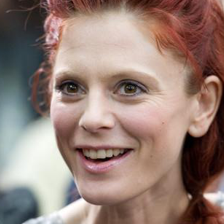

(224, 224, 4)
(224, 224, 3)


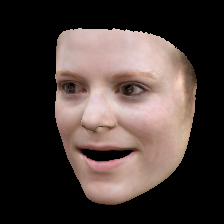

In [20]:
from PIL import Image
from IPython.display import display


file_path = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/output/000002.mat"

face_params = loadmat(file_path)

print(face_params.keys())

cropped_img = face_params['cropped_img']
print(cropped_img.shape, cropped_img.dtype)
display(Image.fromarray(cropped_img))

recon_img = face_params['recon_img']
print(recon_img.shape)

recon_img = recon_img[..., :3]
print(recon_img.shape)

display(Image.fromarray(recon_img.astype(np.uint8)))




## Modify existing file according some conditions

In [ ]:
"""
dataset format:
TAudio id08885/cIqVKLOtfyk/00251 id08885/cIqVKLOtfyk/00251 5.31 0 5.31 0 0 146975
TFAudio id04335/WEed3nlDs80/00045 id04346/2rc759vfCb0/00003 5.88 0 3.58 3.58 5.88 146977
TSilence silence/4O2JKS94g3Y/20463 silence/4O2JKS94g3Y/20463 2.46 1.4 2.46 0 1.4 146979
"""
def remove_specified_lines(src_file, remove_list=[]):
    lines = open(src_file).read().splitlines()

    lines_new = []
    for line in lines:
        data = line.split()
        if data[0] in remove_list:
            continue
        lines_new.append(line)
    
    lines_new_str = "\n".join(lines_new)
    with open("test_new.txt", "w") as fp:
        fp.write(lines_new_str)

remove_specified_lines("./lists/lists_out/test.txt", remove_list=["TSilence", "TFAudio", "FSilence"])

## Pickle file (.dat/.pickle)

In [4]:
import pickle
import numpy as np
import os
import os.path as osp
from glob import glob

# file_path = "/data/data0/zhanghm/Tracking/pred_tracklets_0_train.dat"
# data2array_verts = pickle.load(open(file_path, 'rb'))
# print(len(data2array_verts), data2array_verts)

def save_pickle_file():
    pickle_file = "data.pickle"
    data_list = [1, 2, 4, 5]
    with open(pickle_file, 'wb') as f:
        print(f"Dump pickle to {pickle_file}...")
        pickle.dump(data_list, f)

def read_ShapeNetViPC():
    view_id = "05"
    type = "GT"
    output_dir = "./data"
    os.makedirs(output_dir)

    pc_path = f"/data/zhanghm/Datasets/ShapeNet/ShapeNetViPC/ShapeNetViPC-Dataset/ShapeNetViPC-GT/02691156/10155655850468db78d106ce0a280f87/{view_id}.dat"

    with open(pc_path,'rb') as f:
        pc = pickle.load(f).astype(np.float32)
    print(pc.shape)
    np.savetxt(f"{output_dir}/{type}_{view_id}.xyz", pc)

def read_ShapeNetViPC2():
    output_dir = "./ViPC_data"
    os.makedirs(output_dir, exist_ok=True)
    type = "GT"
    pc_dir = "./ShapeNetViPC-Dataset/ShapeNetViPC-GT/03636649/a654df55875a2104d663817442d5278"
    type = "Partial"
    pc_dir = "./ShapeNetViPC-Dataset/ShapeNetViPC-Partial/03636649/a654df55875a2104d663817442d5278"

    files = sorted(glob(osp.join(pc_dir, "*.dat")))
    for pc_path in files:
        view_id = os.path.basename(pc_path)[:-4]
        pc = pickle.load(open(pc_path, 'rb')).astype(np.float32)
        np.savetxt(f"{output_dir}/{type}_{view_id}.xyz", pc)

read_ShapeNetViPC2()

## Read the npy files

In [36]:
data_root = "/home/zhanghm/Temp/cv-fighter/data_fighter/HDTF_preprocessor/HDTF_preprocessed/RD_Radio1_000/deep3dface_npy"
npy_files = sorted(glob(osp.join(data_root, "*.npy")))

npy_files = npy_files[:100]

start = time.time()
for i in tqdm(npy_files):
    mat_content = np.load(i)
end = time.time()
print(i, end - start)

100%|██████████| 100/100 [00:00<00:00, 1663.81it/s]

/home/zhanghm/Temp/cv-fighter/data_fighter/HDTF_preprocessor/HDTF_preprocessed/RD_Radio1_000/deep3dface_npy/000099.npy 0.06597542762756348


## csv file

In [17]:
import pandas as pd
import numpy as np


def load_GenSDF_csv():
    csv_fp = "/home/zhanghm/Research/PU/gensdf/data/acronym/Helicopter/71516ab131e80269a294ffdcf0d186b/sdf_data.csv"
    csv_fp = "/home/zhanghm/Research/PU/gensdf/data/acronym/QueenBed/fd9381b7c4fcc7a0f11c3739edd52fa3/sdf_data.csv"
    csv_fp = "/home/zhanghm/Research/PU/gensdf/data/acronym/Teapot/93c6553dc3f2ad11012cc02986a86c3/sdf_data.csv"
    
    f = pd.read_csv(csv_fp, sep=',',header=None).values
    print(f.shape, f.dtype)
    data = f[:, :3]
    print(data.shape, data.min(), data.max())
    return

    pc = f[f[:,-1]==0][:,:3]
    print(pc.shape)
    np.savetxt("labeled_data_0.xyz", pc)

    pos_sample = f[f[:,-1]>0][:,:3]
    print(pos_sample.shape)
    np.savetxt("labeled_data_pos_0.xyz", pos_sample)

    neg_sample = f[f[:,-1]<0][:,:3]
    print(neg_sample.shape)
    np.savetxt("labeled_data_neg_0.xyz", neg_sample)
    
    samples = np.concatenate([pos_sample, neg_sample], 0)
    print(samples.shape)


load_GenSDF_csv()

(705000, 4) float64
(705000, 3) -0.438127 0.51661


## Point Cloud Related Data

### Save .obj file

In [1]:
from scipy.io import loadmat
import numpy as np

def write_obj(points, file, rgb=False):
    """Write obj file which can be opened by MeshLab

    Args:
        points (np.ndarray): (N, 3)
        file (str|path): save path
        rgb (bool, optional): including rgb information. Defaults to False.
    """
    fout = open(file, 'w')
    for i in range(points.shape[0]):
        if not rgb:
            fout.write('v %f %f %f %d %d %d\n' % (
                points[i, 0], points[i, 1], points[i, 2], 255, 255, 0))
        else:
            fout.write('v %f %f %f %d %d %d\n' % (
                points[i, 0], points[i, 1], points[i, 2], points[i, -3] * 255, points[i, -2] * 255,
                points[i, -1] * 255))

def visualize_voca_template():
    import pickle

    template_file = "/data/zhanghm/Datasets/Face/VOCASET/training_data/templates.pkl"
    with open(template_file, 'rb') as fin:
        templates = pickle.load(fin, encoding='latin1')

    for key, value in templates.items():
        file_path = f"./data/{key}.obj"
        # write_obj(value, file_path)
        print(value.shape)
        print(value.min(), value.max())


def visualize_BFM():
    model = loadmat(os.path.join("/data/zhanghm/3DMM/BFM", "BFM_model_front.mat"))
    mean_shape = model['meanshape'].astype(np.float32) # [3*N,1]
    id_base = model['idBase'].astype(np.float32) # [3*N,80]
    exp_base = model['exBase'].astype(np.float32) # [3*N,64]
    # face_shape = mean_shape.reshape([1, -1])
    # face_shape = face_shape.reshape([-1, 3])
    # write_obj(face_shape, "./data/mean_face.obj")

    ## Generate a face
    print(exp_base.min(), exp_base.max())
    id_info = np.ones((1, 80)) @ id_base.T
    # id_info = id_info.reshape([-1, 3])
    print(id_info.min(), id_info.max())

    exp_param = np.load("/home/haimingzhang/Programming/programming-learning-examples/Python_learning/DL/3DMM/exp.npy")
    # exp_info = np.random.randn(1, 64) @ exp_base.T
    exp_info = exp_param @ exp_base.T

    print("exp_info: ", exp_info.min(), exp_info.max())

    face_shape = mean_shape.reshape([1, -1]) + id_info + exp_info
    face_shape = face_shape.reshape([-1, 3])
    write_obj(face_shape, "./data/exp=another2.obj")


# visualize_BFM()
visualize_voca_template()

(5023, 3)
-0.19860287010669708 0.12796710431575775
(5023, 3)
-0.19646745920181274 0.12486376613378525
(5023, 3)
-0.17445547878742218 0.13326479494571686
(5023, 3)
-0.1906667947769165 0.1361703723669052
(5023, 3)
-0.18449755012989044 0.12352914363145828
(5023, 3)
-0.18335306644439697 0.1263478696346283
(5023, 3)
-0.19270353019237518 0.13427014648914337
(5023, 3)
-0.2072237730026245 0.1323167383670807
(5023, 3)
-0.1914709359407425 0.1417452096939087
(5023, 3)
-0.19360646605491638 0.12838691473007202
(5023, 3)
-0.18753154575824738 0.13874344527721405
(5023, 3)
-0.18725793063640594 0.1356906294822693


### .xyz file

In [5]:
import numpy as np
from glob import glob

all_pc_files = sorted(glob("/data/data2/zhanghm/Datasets/PU/PU-GAN/gt_FPS_8192/*.xyz"))
print(len(all_pc_files))

pc_data_list = []
for pc_fp in all_pc_files:
    pc = np.loadtxt(pc_fp)
    pc_data_list.append(pc)

pc_data_arr = np.stack(pc_data_list, axis=0)

print(pc_data_arr.shape, pc_data_arr.min(), pc_data_arr.max())

28
(28, 8192, 3) -0.997821 0.998888


## h5 file

In [22]:
def save_xyz_file(numpy_array, fp):
    num_points = numpy_array.shape[0]
    with open(fp, 'w') as f:
        for i in range(num_points):
            line = "%f %f %f\n" % (numpy_array[i, 0], numpy_array[i, 1], numpy_array[i, 2])
            f.write(line)
    
import h5py
import numpy as np

h5_fp = "/data/zhanghm/Datasets/PUGAN/Patches_noHole_and_collected.h5"
h5_fp = "/data/zhanghm/Datasets/PUGAN/PUGAN_poisson_256_poisson_1024.h5"

h5_file = h5py.File(h5_fp, 'r')
print(h5_file.keys())

gt = h5_file['poisson_1024']
print(gt.shape, type(gt))
gt = np.array(gt)
input = np.array(h5_file['poisson_256'])
print(gt.min(), gt.max(), gt[0].min(), gt[0].max())

idx = 20
save_xyz_file(input[idx], f"idx_{idx}_poisson_256.xyz")
save_xyz_file(gt[idx], f"idx_{idx}_poisson_1024.xyz")

centroid = np.mean(gt[..., :3], axis=1, keepdims=True)
print(centroid.min(), centroid.max(), centroid.shape)

<KeysViewHDF5 ['poisson_1024', 'poisson_256']>
(24000, 1024, 3) <class 'h5py._hl.dataset.Dataset'>
-36.54144 36.54144 -1.800646 1.800646
-5.604953 5.202915 (24000, 1, 3)


## hdf5 file usages

In [1]:
import h5py
import numpy as np
import random
import os.path as osp

### Read hdf5 file
https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html

In [3]:
def read_PUGAN_h5_data(save_patches=True):
    h5_fp = "./PU-GAN/train/PUGAN_poisson_256_poisson_1024.h5"

    h5_file = h5py.File(h5_fp, 'r')
    print(h5_file.keys())

    poisson_1024 = h5_file['poisson_1024'][:]
    poisson_256 = h5_file['poisson_256'][:]
    print(poisson_1024.shape, poisson_256.shape, poisson_1024.min(), poisson_1024.max())

    idx = random.randint(0, poisson_1024.shape[0])
    choose_pc_1024 = poisson_1024[idx]
    choose_pc_256 = poisson_256[idx]

    np.savetxt(f"./data/idx_{idx}_poisson_1024.xyz", choose_pc_1024)
    np.savetxt(f"./data/idx_{idx}_poisson_256.xyz", choose_pc_256)

    if save_patches:
        gt = poisson_1024
        choices = np.random.choice(gt.shape[0], 100, replace=False)
        sub_gt = gt[choices]
        print(sub_gt.shape)
        for i in range(sub_gt.shape[0]):
            pc = sub_gt[i]
            path = osp.join("./PUGAN_training_patches/", f"idx_{choices[i]}.xyz")
            np.savetxt(path, pc)


def read_punet_h5_data():
    h5_fp = "/data/zhanghm/Datasets/PUGAN/Patches_noHole_and_collected.h5"

    h5_file = h5py.File(h5_fp, 'r')
    print(h5_file.keys())

    gt = h5_file['poisson_4096'][:][..., :3]
    print(gt.shape, gt.min(), gt.max()) # [-1.0, 1.0]
    idx = 2000
    np.savetxt(f"punet_sample_{idx}.xyz", gt[idx])


def read_Acronym_h5_data():
    h5_fp = "/data/zhanghm/Datasets/grasps/Lamp_14cbef4f4a67e57a4cf9c858305a22f8_0.0013113576511285083.h5"

    grasps = h5py.File(h5_fp, 'r')
    print(grasps.keys())
    grasps.visititems(print)
    file = grasps['object/file'][()]
    # file = grasps['object/file'][:]
    print(file, type(file), str(file))
    s1 = str(file, encoding='utf-8')
    print(s1)

    transforms = grasps['grasps/transforms']
    print(transforms.shape, transforms[0], type(transforms))

def read_PU1K_h5_data(save_patches=True):
    h5_fp = "./PU1K/train/pu1k_poisson_256_poisson_1024_pc_2500_patch50_addpugan.h5"
    contents = h5py.File(h5_fp, 'r')
    print(contents.keys())

    gt = contents['poisson_1024'][:]
    print(gt.shape)
    frame_idx = 500
    np.savetxt(f"{frame_idx}_1024.xyz", gt[frame_idx])

    if save_patches:
        choices = np.random.choice(gt.shape[0], 100, replace=False)
        sub_gt = gt[choices]
        print(sub_gt.shape)
        for i in range(sub_gt.shape[0]):
            pc = sub_gt[i]
            path = osp.join("./PU1K_training_patches/", f"idx_{choices[i]}.xyz")
            np.savetxt(path, pc)


def read_ScanObjectNN_h5_data():
    h5_fp = "h5_files/main_split/training_objectdataset.h5"
    # h5_fp = "h5_files/main_split_nobg/training_objectdataset.h5"
    contents = h5py.File(h5_fp, 'r')
    print(contents.keys())

    data = contents['data'][:]
    print(data.shape)
    frame_idx = 10
    np.savetxt(f"{frame_idx}_1024.xyz", data[frame_idx])

    data = contents['label'][:]
    print(data.shape)
    print(data[:10])


read_PUGAN_h5_data()

<KeysViewHDF5 ['poisson_1024', 'poisson_256']>
(24000, 1024, 3) (24000, 256, 3) -36.54144 36.54144
(100, 1024, 3)


### Save hdf5 file

In [15]:
def save_h5_file(output_fp, data):

    with h5py.File(output_fp, "w") as f:
        f.create_dataset('poisson_1024', data=data)
        f.close()


def combine_PUGAN_and_PU1K_dataset():
    ## 1) Read the PU1K dataset
    pu1k_h5_fp = "/data/zhanghm/Datasets/PU_Dataset/PU1K/train/pu1k_poisson_256_poisson_1024_pc_2500_patch50_addpugan.h5"
    pu1k_contents = h5py.File(pu1k_h5_fp, 'r')
    pu1k_poisson_1024 = pu1k_contents['poisson_1024'][:] # (69000, 1024, 3)
    print(pu1k_poisson_1024.shape, pu1k_poisson_1024.min(), pu1k_poisson_1024.max())

    ## 2) Read the PUGAN dataset
    pugan_h5_fp = "/data/zhanghm/Datasets/PUGAN/PUGAN_poisson_256_poisson_1024.h5"

    pugan_contents = h5py.File(pugan_h5_fp, 'r')
    print(pugan_contents.keys())

    poisson_1024 = pugan_contents['poisson_1024'][:] # (24000, 1024, 3)
    poisson_256 = pugan_contents['poisson_256'][:]
    print(poisson_1024.shape, poisson_256.shape, poisson_1024.min(), poisson_1024.max())

    ## 3) Combine the two datasets
    combined_poisson_1024 = np.concatenate((poisson_1024, pu1k_poisson_1024), axis=0)
    
    print(combined_poisson_1024.shape)
    save_h5_file("./data/temp.h5", combined_poisson_1024)

    
combine_PUGAN_and_PU1K_dataset()

(69000, 1024, 3) -36.54144 36.54144
<KeysViewHDF5 ['poisson_1024', 'poisson_256']>
(24000, 1024, 3) (24000, 256, 3) -36.54144 36.54144
(93000, 1024, 3)


In [8]:
from icecream import ic as print


data_path = "/home/zhanghm/Research/PU/ShapeFormer/datasets/IMNet2_packed/train.hdf5"
# data_path = "/data/zhanghm/Datasets/ShapeFormer/IMNet2_64/train.hdf5"
# data_path = "/data/zhanghm/Datasets/ShapeFormer/IMNet2_64/test.hdf5"

def analyse_shapeformer_dataset():
    cate_idx = list(range(13))

    with h5py.File(data_path, 'r') as f:
        print(f.keys())
        Xbd = f['Xbd'].astype(np.float32)
        print(Xbd.shape, type(Xbd))

        for i in cate_idx:
            curr_cate = f"cate_{i}"
            print(curr_cate, f[curr_cate].shape, f[curr_cate].dtype)


def analyse_shapeformer_origin_dataset():
    data_path = "/home/zhanghm/Research/PU/ShapeFormer/datasets/IMNet2_64/train.hdf5"
    data_dict = h5py.File(data_path, 'r')
    print(data_dict.keys())

    select = random.choice(range(35019))
    print(select)

    Xbd = data_dict['Xbd'][:].astype(np.float32) # (35019, 65536, 3) in [-1, 1.0]
    print("Xbd: ", Xbd.shape, Xbd.min(), Xbd.max()) 
    Xbd_vis = Xbd[select]
    np.savetxt(f"{select}_Xbd.xyz", Xbd_vis)

    # Ytg = data_dict['Ytg'][:].astype(np.float32) # (35019, 32768) in [0, 255]
    # print("Ytg: ", Ytg.shape, Ytg.min(), Ytg.max())

    Ytg = data_dict['Ytg'] # (35019, 32768) in [0, 255]
    Ytg = np.unpackbits(Ytg[select], axis=-1)[..., None]
    Ytg = Ytg.astype(np.float32)
    print("Ytg: ", Ytg.shape, Ytg.min(), Ytg.max())
    np.save(f"{select}_Ytg.npy", Ytg)


def analyse_shapeformer_256_dataset():
    data_path = "/home/zhanghm/Research/PU/ShapeFormer/datasets/IMNet2_packed/train.hdf5"
    data_dict = h5py.File(data_path, 'r')
    print(data_dict.keys())

    select = random.choice(range(35019))
    print(select)

    Xbd = data_dict['Xbd'][:].astype(np.float32) # (35019, 65536, 3) in [-1, 1.0]
    print("Xbd: ", Xbd.shape, Xbd.min(), Xbd.max()) 
    Xbd_vis = Xbd[select]
    np.savetxt(f"res256_{select}_Xbd.xyz", Xbd_vis)


def analyse_IMNet_dataset():
    data_path = "/home/zhanghm/Research/PU/ShapeFormer/datasets/IM-NET/IMSVR/data/all_vox256_img_train.hdf5"
    data_dict = h5py.File(data_path, 'r')
    print(data_dict.keys())
    voxels = data_dict['voxels'][:].astype(np.float32)
    print("voxels: ", voxels.shape)

    values_16 = data_dict['values_16'][:].astype(np.float32)
    print("values_16: ", values_16.shape)

    points_16 = data_dict['points_16'][:].astype(np.float32)
    points_64 = data_dict['points_64'][:].astype(np.float32)
    print(points_16.shape, points_16.min(), points_16.max())
    print(points_64.shape, points_64.min(), points_64.max())

    num_models = points_16.shape[0]
    select = random.choice(range(num_models))
    print(select)

    point_16 = points_16[select]
    point_64 = points_64[select]

    np.savetxt(f"sample_{select}_point_16.xyz", point_16)
    np.savetxt(f"sample_{select}_point_64.xyz", point_64)


def analyse_IMNet_dataset2():
    data_path = "/home/zhanghm/Research/PU/ShapeFormer/datasets/IM-NET/IMSVR/data/all_vox256_img_z.hdf5"
    data_dict = h5py.File(data_path, 'r')
    print(data_dict.keys())

    zs = data_dict['zs'][:].astype(np.float32)
    print(zs.shape)


# analyse_IMNet_dataset()

analyse_shapeformer_origin_dataset()
# analyse_shapeformer_256_dataset()

ic| data_dict.keys(): <KeysViewHDF5 ['Xbd', 'Ytg', 'cate_0', 'cate_1', 'cate_10', 'cate_11', 'cate_12', 'cate_2', 'cate_3', 'cate_4', 'cate_5', 'cate_6', 'cate_7', 'cate_8', 'cate_9']>
ic| select: 2774
ic| "Xbd: ": 'Xbd: '
    Xbd.shape: (35019, 65536, 3)
    Xbd.min(): -0.99999994
    Xbd.max(): 0.99999994
ic| 'Ytg: ', Ytg.shape: (262144, 1), Ytg.min(): 0.0, Ytg.max(): 1.0
